Using device: cuda

--- Sport Classification Dataset Info ---
Number of sports classes: 100
Sport class names (first 5): ['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing']...


C:\Users\Jayant\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Jayant\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



--- Starting Training for Sport Classification ---
Epoch 0/49
----------
train Loss: 4.2547 Acc: 0.0454
valid Loss: 3.7806 Acc: 0.0620
Saved best Sport Classification model with accuracy: 0.0620
Epoch 1/49
----------
train Loss: 3.7101 Acc: 0.1098
valid Loss: 3.3803 Acc: 0.1380
Saved best Sport Classification model with accuracy: 0.1380
Epoch 2/49
----------
train Loss: 3.3688 Acc: 0.1739
valid Loss: 3.1059 Acc: 0.2220
Saved best Sport Classification model with accuracy: 0.2220
Epoch 3/49
----------
train Loss: 3.0717 Acc: 0.2343
valid Loss: 2.6792 Acc: 0.2960
Saved best Sport Classification model with accuracy: 0.2960
Epoch 4/49
----------
train Loss: 2.8761 Acc: 0.2735
valid Loss: 2.3850 Acc: 0.3660
Saved best Sport Classification model with accuracy: 0.3660
Epoch 5/49
----------
train Loss: 2.6612 Acc: 0.3239
valid Loss: 2.1068 Acc: 0.4480
Saved best Sport Classification model with accuracy: 0.4480
Epoch 6/49
----------
train Loss: 2.4561 Acc: 0.3648
valid Loss: 1.7926 Acc: 0.5080


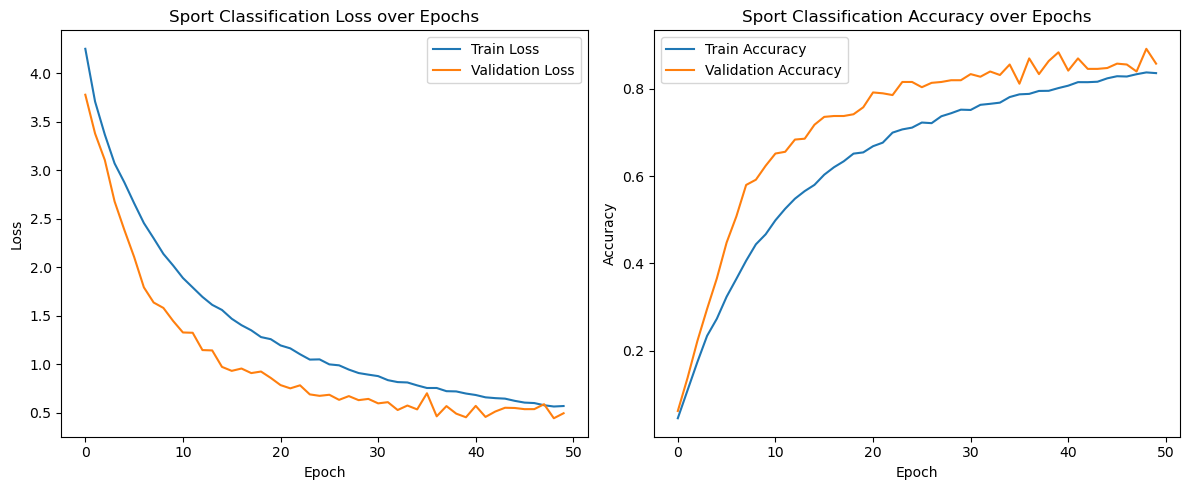


--- Tennis Action Classification Dataset Info ---
Number of tennis action classes: 4
Tennis action class names: ['backhand', 'forehand', 'ready_position', 'serve']
Number of tennis training images: 1600
Number of tennis validation images: 200
Number of tennis test images: 200


C:\Users\Jayant\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Jayant\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



--- Starting Training for Tennis Action Classification ---
Epoch 0/19
----------
train Loss: 0.7768 Acc: 0.6925
valid Loss: 5.3834 Acc: 0.6150
Saved best Tennis Action Classification model with accuracy: 0.6150
Epoch 1/19
----------
train Loss: 0.4108 Acc: 0.8413
valid Loss: 0.3860 Acc: 0.8450
Saved best Tennis Action Classification model with accuracy: 0.8450
Epoch 2/19
----------
train Loss: 0.3185 Acc: 0.8712
valid Loss: 0.5389 Acc: 0.8150
Epoch 3/19
----------
train Loss: 0.2849 Acc: 0.8844
valid Loss: 0.3636 Acc: 0.8350
Epoch 4/19
----------
train Loss: 0.2543 Acc: 0.8962
valid Loss: 0.4507 Acc: 0.8250
Epoch 5/19
----------
train Loss: 0.2956 Acc: 0.8850
valid Loss: 0.9629 Acc: 0.7450
Epoch 6/19
----------
train Loss: 0.2857 Acc: 0.8944
valid Loss: 0.3833 Acc: 0.8650
Saved best Tennis Action Classification model with accuracy: 0.8650
Epoch 7/19
----------
train Loss: 0.1705 Acc: 0.9350
valid Loss: 0.2357 Acc: 0.9350
Saved best Tennis Action Classification model with accuracy: 0.9

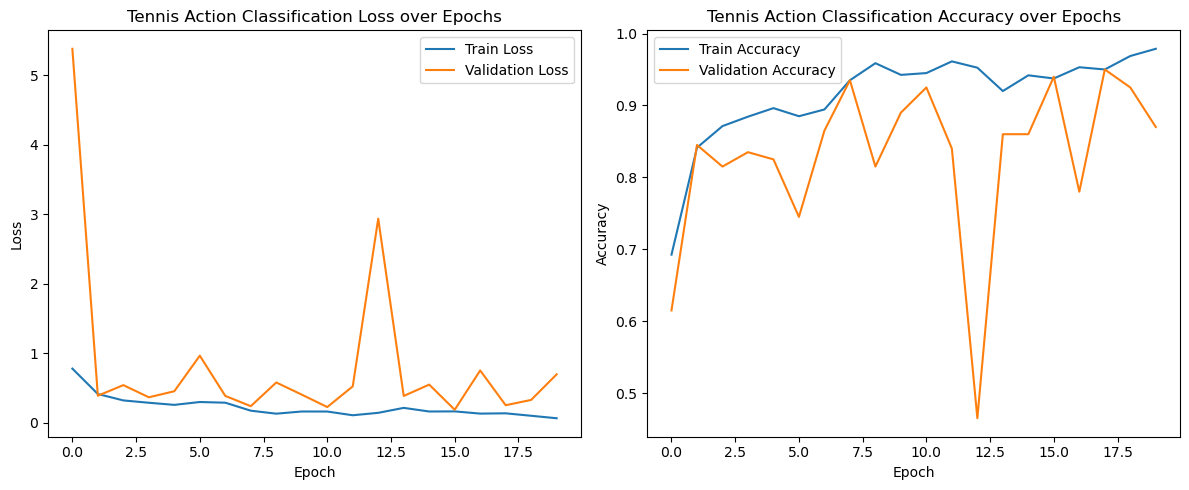

C:\Users\Jayant\AppData\Local\Temp\ipykernel_89092\1897387848.py:348: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_sport_trained.load_state_dict(torch.load(SPORTS_MOD


--- Starting Combined Hierarchical Predictions ---

To test, manually find an image in your 'tennis-action-dataset/forehand/' folder and replace the path.

--- Processing Image: 1.jpg ---
Predicted Sport: football (Confidence: 0.9717)
  (No specific action classification for football)


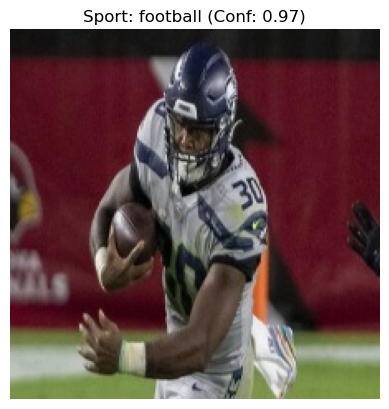


Combined project finished. Please check the console output and displayed images for predictions.


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import os
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}") 

# ImageNet normalization stats (standard for pre-trained models)
NORM_MEAN = [0.485, 0.456, 0.406]
NORM_STD = [0.229, 0.224, 0.225]

# --- General Data Transforms ---
common_train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(NORM_MEAN, NORM_STD)
])

common_eval_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(NORM_MEAN, NORM_STD)
])

# --- Reusable Model Training Function ---
def train_and_save_model(model, dataloaders, dataset_sizes, criterion, optimizer, num_epochs, model_save_path, phase_name):
    best_acc = 0.0
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    print(f"\n--- Starting Training for {phase_name} ---")
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc.item())
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc.item())

            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                torch.save(model.state_dict(), model_save_path)
                print(f"Saved best {phase_name} model with accuracy: {best_acc:.4f}")

    print(f'Training complete for {phase_name}. Best validation accuracy: {best_acc:.4f}')
    return model, history

# --- Reusable Evaluation Function ---
def evaluate_model(model, dataloader, dataset_size, class_names, phase_name):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    print(f"\n--- Classification Report ({phase_name} Test Set) ---")
    print(classification_report(all_labels, all_preds, target_names=class_names, zero_division=0))

# --- Plotting Training History ---
def plot_history(history, title_prefix):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'{title_prefix} Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title(f'{title_prefix} Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# --- Combined Hierarchical Inference Function ---
def predict_combined(image_path, model_sport, model_tennis_action, sport_class_names, tennis_action_class_names, device):
    preprocess = common_eval_transforms

    image = Image.open(image_path).convert('RGB')
    image_tensor = preprocess(image).unsqueeze(0)
    image_tensor = image_tensor.to(device)

    print(f"\n--- Processing Image: {os.path.basename(image_path)} ---")

    # Step 1: Predict the Sport
    with torch.no_grad():
        sport_output = model_sport(image_tensor)
        sport_probabilities = torch.nn.functional.softmax(sport_output, dim=1)[0]
        predicted_sport_idx = torch.argmax(sport_probabilities).item()
        predicted_sport = sport_class_names[predicted_sport_idx]
        sport_confidence = sport_probabilities[predicted_sport_idx].item()

    print(f"Predicted Sport: {predicted_sport} (Confidence: {sport_confidence:.4f})")

    # Step 2: If the sport is Tennis, predict the Action
    # Use .lower() for case-insensitive comparison
    if predicted_sport.lower() == 'tennis':
        with torch.no_grad():
            tennis_action_output = model_tennis_action(image_tensor)
            action_probabilities = torch.nn.functional.softmax(tennis_action_output, dim=1)[0]
            predicted_action_idx = torch.argmax(action_probabilities).item()
            predicted_action = tennis_action_class_names[predicted_action_idx]
            action_confidence = action_probabilities[predicted_action_idx].item()

        print(f"  --> Predicted Tennis Action: {predicted_action} (Confidence: {action_confidence:.4f})")
    else:
        print(f"  (No specific action classification for {predicted_sport})")

    # Display the image with overall prediction
    plt.imshow(image)
    overall_title = f"Sport: {predicted_sport} (Conf: {sport_confidence:.2f})"
    if predicted_sport.lower() == 'tennis':
        overall_title += f"\nAction: {predicted_action} (Conf: {action_confidence:.2f})"
    plt.title(overall_title)
    plt.axis('off')
    plt.show()



if __name__ == '__main__':
    print(f"Using device: {device}") # Print device info here

    # Part 1: Sport Classification Model
    # https://www.kaggle.com/datasets/gpiosenka/sports-classification

    SPORTS_DATA_DIR = 'C:/Users/Jayant/Documents/DL IMAGE PROCESSING/archive'
    SPORTS_TRAIN_DIR = os.path.join(SPORTS_DATA_DIR, 'train')
    SPORTS_VALID_DIR = os.path.join(SPORTS_DATA_DIR, 'valid')
    SPORTS_TEST_DIR = os.path.join(SPORTS_DATA_DIR, 'test')
    SPORTS_MODEL_PATH = 'best_resnet_sports_classifier.pth'
    SPORTS_BATCH_SIZE = 16
    SPORTS_NUM_EPOCHS = 50
    SPORTS_LR = 0.001

    sports_image_datasets = {
        'train': datasets.ImageFolder(SPORTS_TRAIN_DIR, common_train_transforms),
        'valid': datasets.ImageFolder(SPORTS_VALID_DIR, common_eval_transforms),
        'test': datasets.ImageFolder(SPORTS_TEST_DIR, common_eval_transforms)
    }

    # Create data loaders for sports classification
    # Set num_workers=0 on Windows to avoid multiprocessing issues
    sports_dataloaders = {
        'train': DataLoader(sports_image_datasets['train'], batch_size=SPORTS_BATCH_SIZE, shuffle=True, num_workers=0),
        'valid': DataLoader(sports_image_datasets['valid'], batch_size=SPORTS_BATCH_SIZE, shuffle=False, num_workers=0),
        'test': DataLoader(sports_image_datasets['test'], batch_size=SPORTS_BATCH_SIZE, shuffle=False, num_workers=0)
    }

    sports_dataset_sizes = {x: len(sports_image_datasets[x]) for x in ['train', 'valid', 'test']}
    sport_class_names = sports_image_datasets['train'].classes
    num_sports_classes = len(sport_class_names)

    print(f"\n--- Sport Classification Dataset Info ---")
    print(f"Number of sports classes: {num_sports_classes}")
    print(f"Sport class names (first 5): {sport_class_names[:5]}...")

    # Initialize Sport Classification Model
    model_sport = models.resnet50(pretrained=True)
    num_ftrs_sport = model_sport.fc.in_features
    model_sport.fc = nn.Linear(num_ftrs_sport, num_sports_classes)
    model_sport = model_sport.to(device)

    criterion_sport = nn.CrossEntropyLoss()
    optimizer_sport = optim.Adam(model_sport.parameters(), lr=SPORTS_LR)

    # Train Sport Classification Model
    model_sport_trained, history_sport = train_and_save_model(
        model_sport, sports_dataloaders, sports_dataset_sizes,
        criterion_sport, optimizer_sport, SPORTS_NUM_EPOCHS, SPORTS_MODEL_PATH, "Sport Classification"
    )

    # Evaluate Sport Classification Model on its test set
    evaluate_model(model_sport_trained, sports_dataloaders['test'], sports_dataset_sizes['test'], sport_class_names, "Sport Classification")
    plot_history(history_sport, "Sport Classification")

    # Part 2: Tennis Action Classification Model (Second Code Adaption)

    TENNIS_DATA_DIR = 'C:/Users/Jayant/Documents/DL IMAGE PROCESSING/tennis-action-dataset' # Path to the renamed 'images' folder
    TENNIS_MODEL_PATH = 'best_resnet_tennis_action_classifier.pth'
    TENNIS_BATCH_SIZE = 32
    TENNIS_NUM_EPOCHS = 20 
    TENNIS_LR = 0.001
    TENNIS_TRAIN_SPLIT = 0.8
    TENNIS_VALID_SPLIT = 0.1
    TENNIS_TEST_SPLIT = 0.1

    # Create full dataset for tennis action
    full_tennis_dataset = datasets.ImageFolder(TENNIS_DATA_DIR, common_train_transforms)

    tennis_action_class_names = full_tennis_dataset.classes
    num_tennis_action_classes = len(tennis_action_class_names)

    print(f"\n--- Tennis Action Classification Dataset Info ---")
    print(f"Number of tennis action classes: {num_tennis_action_classes}")
    print(f"Tennis action class names: {tennis_action_class_names}")

    # Split the tennis dataset
    tennis_train_size = int(TENNIS_TRAIN_SPLIT * len(full_tennis_dataset))
    tennis_valid_size = int(TENNIS_VALID_SPLIT * len(full_tennis_dataset))
    tennis_test_size = len(full_tennis_dataset) - tennis_train_size - tennis_valid_size

    tennis_train_dataset, tennis_valid_dataset, tennis_test_dataset = random_split(
        full_tennis_dataset, [tennis_train_size, tennis_valid_size, tennis_test_size]
    )

    # Apply evaluation transforms to validation and test sets for tennis
    tennis_valid_dataset.dataset.transform = common_eval_transforms
    tennis_test_dataset.dataset.transform = common_eval_transforms

    # Create data loaders for tennis action classification
    # Set num_workers=0 on Windows to avoid multiprocessing issues
    tennis_dataloaders = {
        'train': DataLoader(tennis_train_dataset, batch_size=TENNIS_BATCH_SIZE, shuffle=True, num_workers=0),
        'valid': DataLoader(tennis_valid_dataset, batch_size=TENNIS_BATCH_SIZE, shuffle=False, num_workers=0),
        'test': DataLoader(tennis_test_dataset, batch_size=TENNIS_BATCH_SIZE, shuffle=False, num_workers=0)
    }

    tennis_dataset_sizes = {
        'train': len(tennis_train_dataset),
        'valid': len(tennis_valid_dataset),
        'test': len(tennis_test_dataset)
    }

    print(f"Number of tennis training images: {tennis_dataset_sizes['train']}")
    print(f"Number of tennis validation images: {tennis_dataset_sizes['valid']}")
    print(f"Number of tennis test images: {tennis_dataset_sizes['test']}")

    # Initialize Tennis Action Classification Model
    model_tennis_action = models.resnet50(pretrained=True)
    num_ftrs_tennis_action = model_tennis_action.fc.in_features
    model_tennis_action.fc = nn.Linear(num_ftrs_tennis_action, num_tennis_action_classes)
    model_tennis_action = model_tennis_action.to(device)

    criterion_tennis_action = nn.CrossEntropyLoss()
    optimizer_tennis_action = optim.Adam(model_tennis_action.parameters(), lr=TENNIS_LR)

    # Train Tennis Action Classification Model
    model_tennis_action_trained, history_tennis_action = train_and_save_model(
        model_tennis_action, tennis_dataloaders, tennis_dataset_sizes,
        criterion_tennis_action, optimizer_tennis_action, TENNIS_NUM_EPOCHS, TENNIS_MODEL_PATH, "Tennis Action Classification"
    )

    # Evaluate Tennis Action Classification Model on its test set
    evaluate_model(model_tennis_action_trained, tennis_dataloaders['test'], tennis_dataset_sizes['test'], tennis_action_class_names, "Tennis Action Classification")
    plot_history(history_tennis_action, "Tennis Action Classification")

    # Part 3: Combined Hierarchical Inference Function

    model_sport_trained.load_state_dict(torch.load(SPORTS_MODEL_PATH))
    model_tennis_action_trained.load_state_dict(torch.load(TENNIS_MODEL_PATH))

    # Set both models to evaluation mode
    model_sport_trained.eval()
    model_tennis_action_trained.eval()

    print("\n--- Starting Combined Hierarchical Predictions ---")

    example_tennis_image_path = os.path.join(TENNIS_DATA_DIR, 'forehand', 'F_001.jpg') # Placeholder
    if os.path.exists(example_tennis_image_path):
        predict_combined(example_tennis_image_path, model_sport_trained, model_tennis_action_trained, sport_class_names, tennis_action_class_names, device)
    else:
        print(f"\nWarning: Tennis example image not found at '{example_tennis_image_path}'. Please provide a valid path.")

    example_other_sport_image_path = os.path.join(SPORTS_DATA_DIR, 'test', 'football', '1.jpg') # Placeholder
    if os.path.exists(example_other_sport_image_path):
        predict_combined(example_other_sport_image_path, model_sport_trained, model_tennis_action_trained, sport_class_names, tennis_action_class_names, device)
    else:
        print(f"\nWarning: Other sport example image not found at '{example_other_sport_image_path}'. Please provide a valid path.")

C:\Users\Jayant\AppData\Local\Temp\ipykernel_89092\1424553999.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_sport_trained.load_state_dict(torch.load(SPORTS_MODEL


--- Ready for Custom Image Predictions ---

--- Processing Image: test4.jpg ---
Predicted Sport: tennis (Confidence: 0.4171)
  --> Predicted Tennis Action: forehand (Confidence: 1.0000)


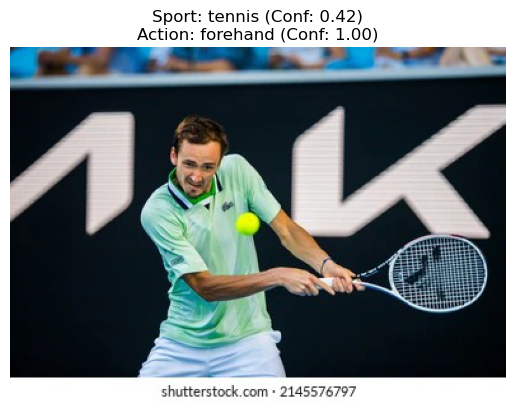

Exiting prediction script.


In [19]:
model_sport_trained.load_state_dict(torch.load(SPORTS_MODEL_PATH))
model_tennis_action_trained.load_state_dict(torch.load(TENNIS_MODEL_PATH))

# Set both models to evaluation mode
model_sport_trained.eval()
model_tennis_action_trained.eval()

print("\n--- Ready for Custom Image Predictions ---")
image_path_input = 'test4.jpg'
predict_combined(image_path_input, model_sport_trained, model_tennis_action_trained, sport_class_names, tennis_action_class_names, device)

print("Exiting prediction script.")